In [1]:
library(tidyverse)
library(chron)

# Set preferences
Sys.setlocale("LC_TIME","C");
options(stringsAsFactors=FALSE)
options(chron.year.abb=FALSE)
theme_set(theme_bw()) # just my preference for plots

# Get working directory
getwd()

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "C"

[1] "/home/my_notebooks/Air_Pollution"

## Get Data

In [2]:
df <- readRDS("MAGLAUS/MAG-LAU.rds")
lf <- df %>%
 gather(variable, value,
 -c(site, datetime, season, year, month, day, hour, dayofwk, daytype))
lf$date <- dates(lf$datetime)

In [3]:
head(lf)

,site,datetime,year,month,day,hour,dayofwk,daytype,season,variable,value,date
,<chr>,<chron>,<ord>,<ord>,<ord>,<dbl>,<ord>,<chr>,<fct>,<chr>,<dbl>,<dates>
1,LAU,(01/01/2022 00:00:00),2022,Jan,1,0,Sat,Weekend,DJF,O3,7.9,01/01/2022
2,LAU,(01/01/2022 01:00:00),2022,Jan,1,1,Sat,Weekend,DJF,O3,2.4,01/01/2022
3,LAU,(01/01/2022 02:00:00),2022,Jan,1,2,Sat,Weekend,DJF,O3,17.7,01/01/2022
4,LAU,(01/01/2022 03:00:00),2022,Jan,1,3,Sat,Weekend,DJF,O3,9.7,01/01/2022
5,LAU,(01/01/2022 04:00:00),2022,Jan,1,4,Sat,Weekend,DJF,O3,17.0,01/01/2022
6,LAU,(01/01/2022 05:00:00),2022,Jan,1,5,Sat,Weekend,DJF,O3,4.3,01/01/2022


In [4]:
lfNona <- drop_na(lf, "value")
lfNona$site <- as.factor(lfNona$site)
lfNona$season <- as.factor(lfNona$season)
lfNona$variable <- as.factor(lfNona$variable)
head(lfNona)

,site,datetime,year,month,day,hour,dayofwk,daytype,season,variable,value,date
,<fct>,<chron>,<ord>,<ord>,<ord>,<dbl>,<ord>,<chr>,<fct>,<fct>,<dbl>,<dates>
1,LAU,(01/01/2022 00:00:00),2022,Jan,1,0,Sat,Weekend,DJF,O3,7.9,01/01/2022
2,LAU,(01/01/2022 01:00:00),2022,Jan,1,1,Sat,Weekend,DJF,O3,2.4,01/01/2022
3,LAU,(01/01/2022 02:00:00),2022,Jan,1,2,Sat,Weekend,DJF,O3,17.7,01/01/2022
4,LAU,(01/01/2022 03:00:00),2022,Jan,1,3,Sat,Weekend,DJF,O3,9.7,01/01/2022
5,LAU,(01/01/2022 04:00:00),2022,Jan,1,4,Sat,Weekend,DJF,O3,17.0,01/01/2022
6,LAU,(01/01/2022 05:00:00),2022,Jan,1,5,Sat,Weekend,DJF,O3,4.3,01/01/2022


In [5]:
pollutants <- c("CO", "NO2", "NOX", "O3", "PM10", "PM2.5")
chemicals <- c("CO", "NO2", "NOX", "O3")
particles <- c("PM10","PM2.5")
meteo <- c(	"TEMP","PREC","RAD")

# View variability in pollutant concentrations

Warning message:
“Removed 8760 rows containing missing values (`geom_line()`).”


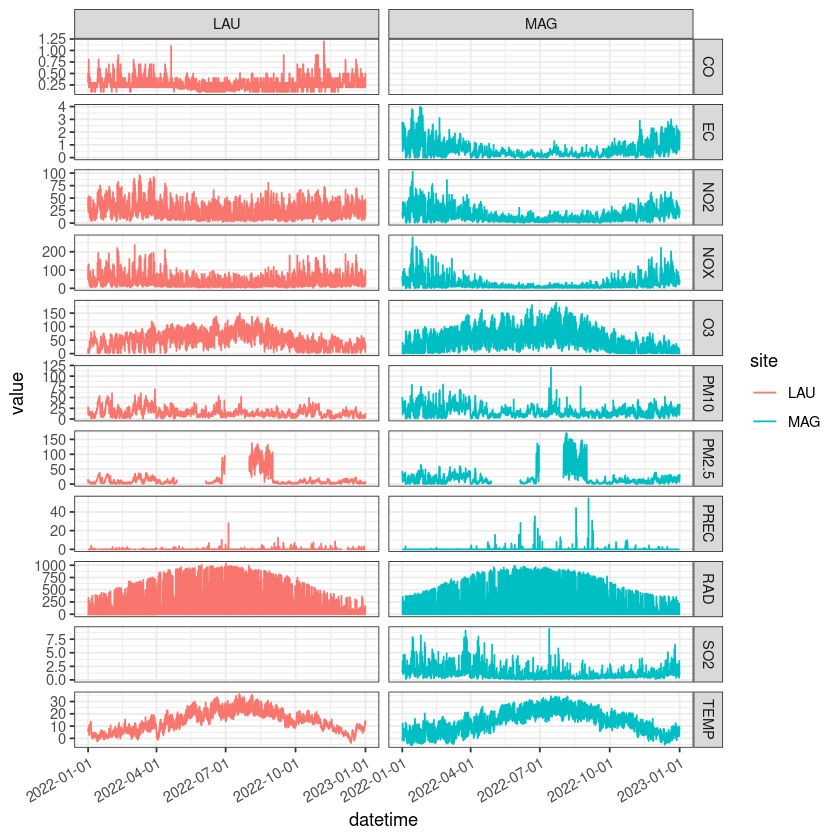

In [13]:
 ggplot(lf)+ # `lf` is the data frame
 facet_grid(variable~site, scale="free_y")+ # panels created out of these variables
 geom_line(aes(datetime, value, color=site))+ # plot `value` vs. `time` as lines
 scale_x_chron()+ # format x-axis labels (time units)
 theme(axis.text.x=element_text(angle=30, hjust=1)) # rotate x-axis labels

# Seasonal variations

Warning message:
“Removed 30053 rows containing non-finite values (`stat_boxplot()`).”


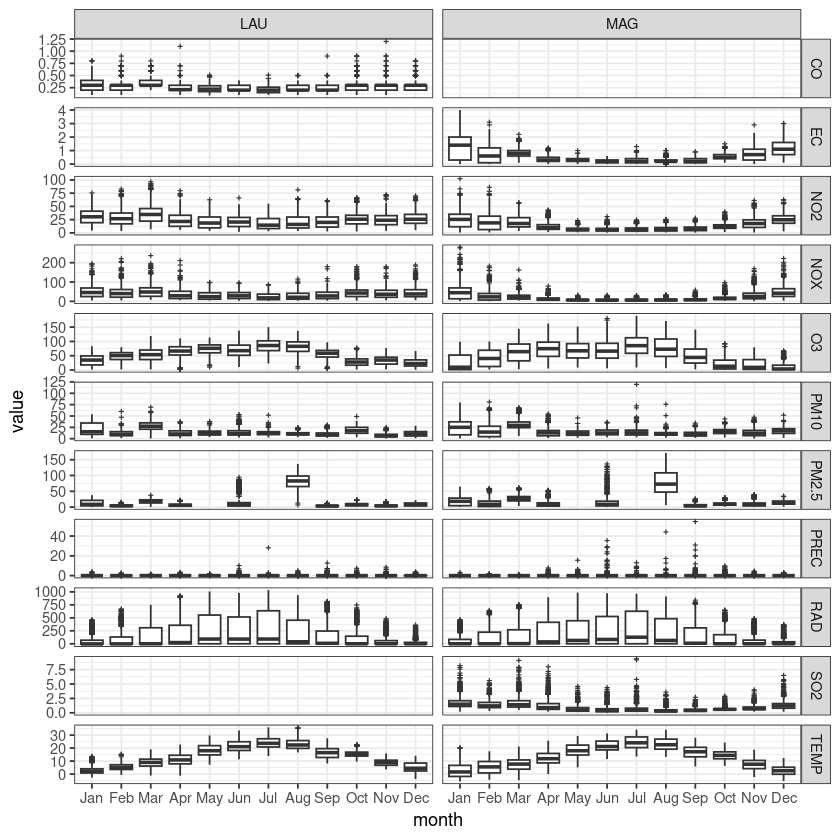

In [14]:
ggplot(lf) +
 facet_grid(variable ~ site, scale = "free_y") +
 geom_boxplot(aes(month, value), outlier.size = 0.5, outlier.shape = 3)

### By season and station

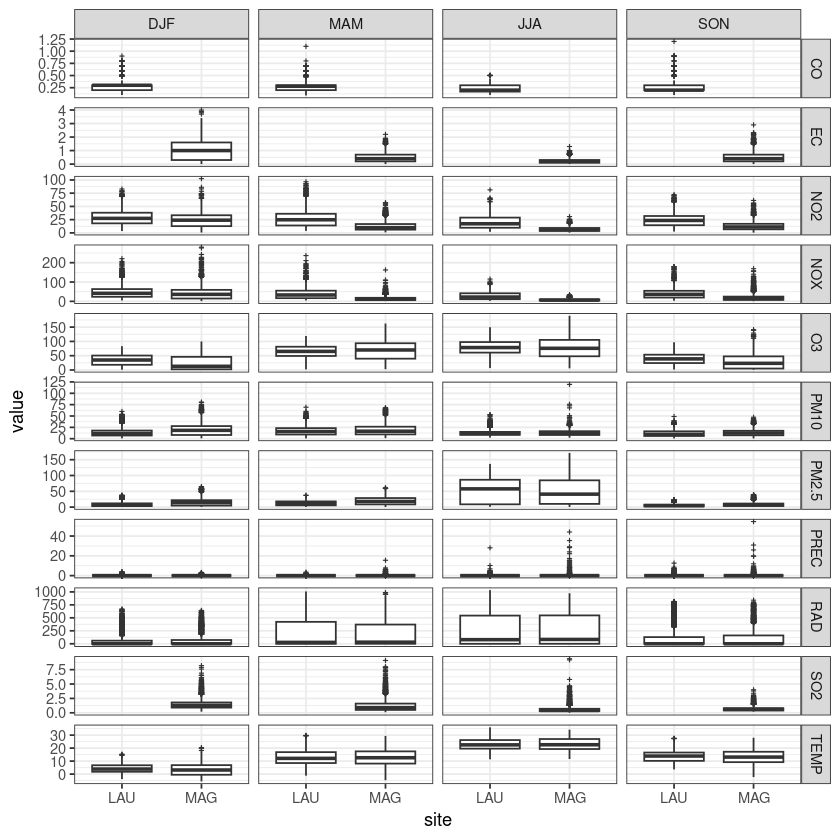

In [15]:
lf %>%
    filter(!is.na(value)) %>%
     ggplot +
     facet_grid(variable ~ season, scale = "free_y") +
     geom_boxplot(aes(site, value), outlier.size = 0.5, outlier.shape = 3)

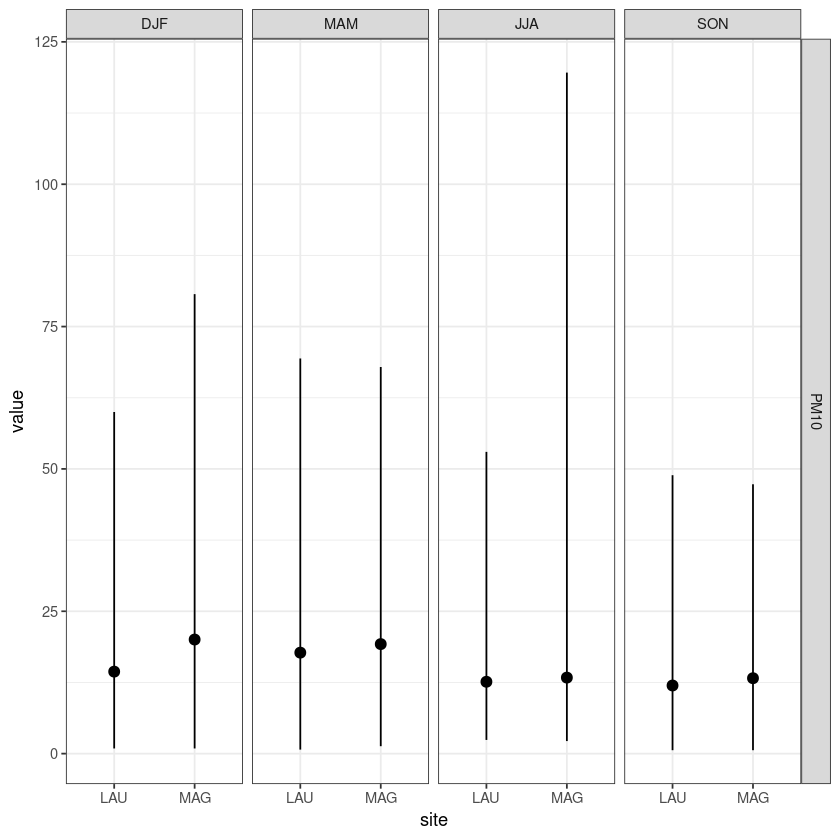

In [16]:
lf %>%
 filter(!is.na(value) & variable==c("PM10")) %>%
    ggplot+ 
     facet_grid(variable ~ season, scale = "free_y") +
      stat_summary(
        mapping = aes(x = site, y = value),
        fun.min = min,
        fun.max = max,
        fun = mean )

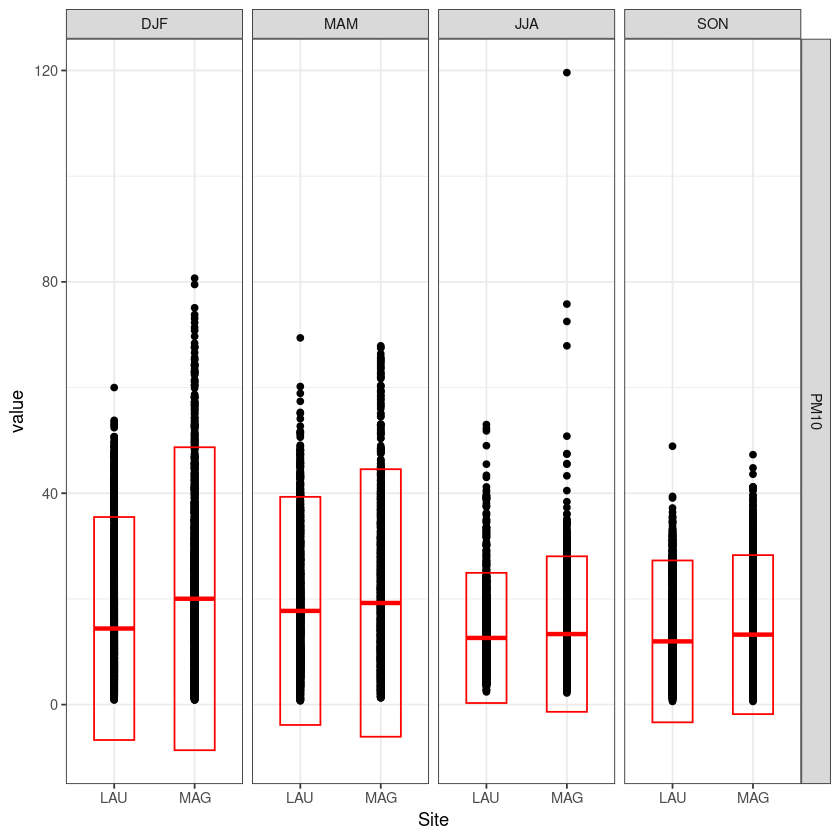

In [17]:
lf %>%
 filter(!is.na(value) & variable==c("PM10")) %>%
    ggplot(aes(x = site, y = value))+ 
     facet_grid(variable ~ season, scale = "free_y") +
        geom_point()+
       stat_summary(
         fun.data = "mean_sdl",
         geom = "crossbar",
         colour = "red", width = 0.5
       ) +
       xlab("Site")

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


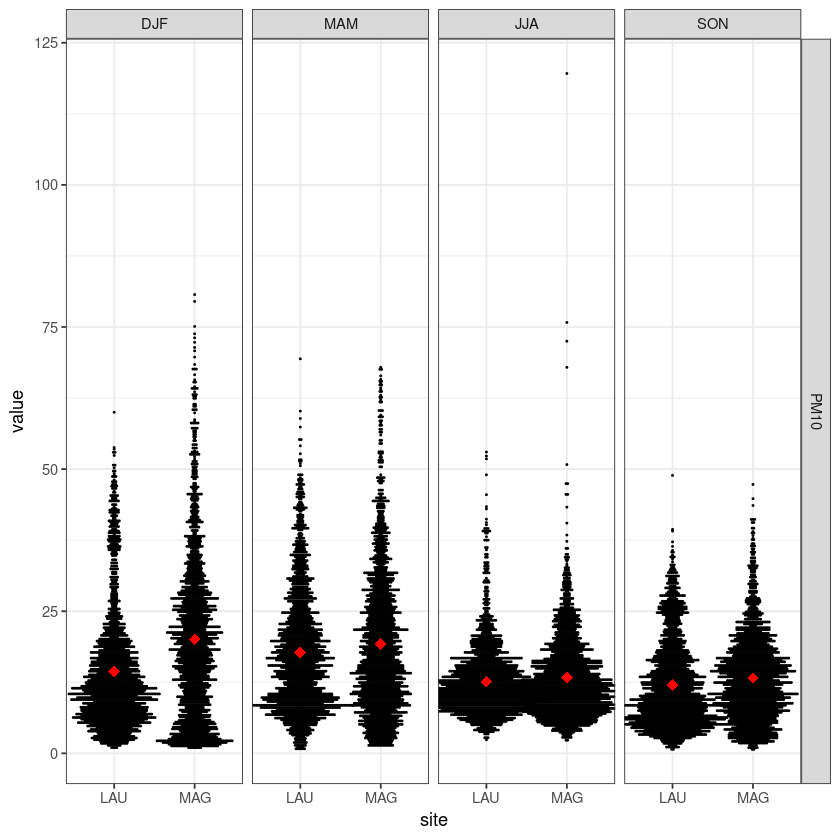

In [18]:
lf %>%
 filter(!is.na(value) & variable==c("PM10")) %>%
    ggplot(aes(x = site, y = value))+ 
     facet_grid(variable ~ season, scale = "free_y") +
        geom_dotplot(binaxis='y', stackdir='center', binwidth=0.3)+
        stat_summary(fun.y=mean, geom="point", shape=18,
                 size=3, color="red")

png 
  2

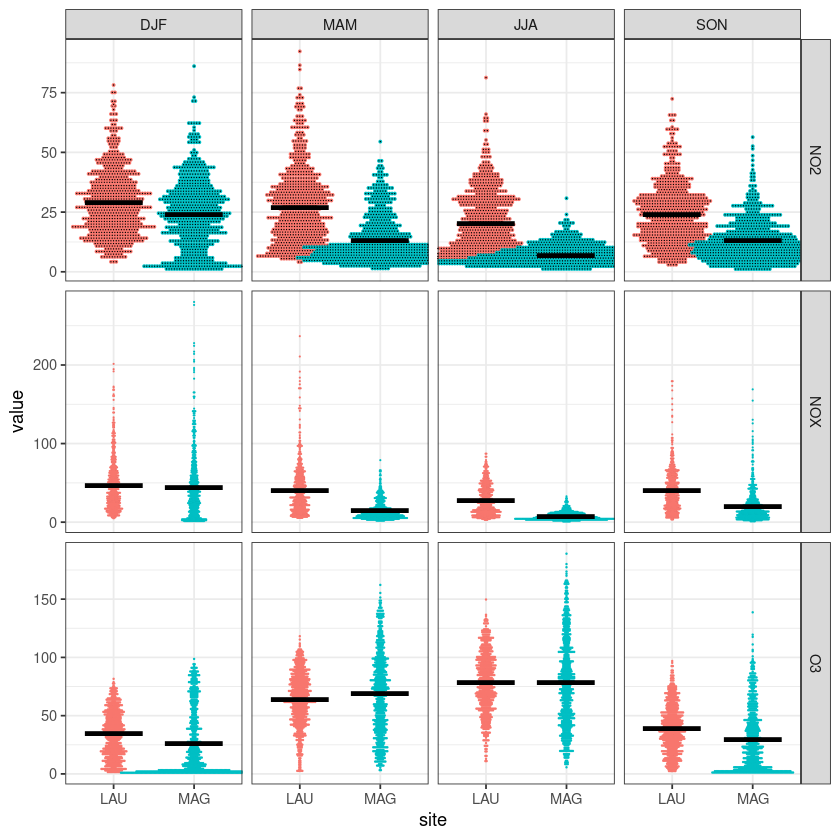

In [29]:
lf %>%
 filter(!is.na(value) & variable==c("NO2", "NOX", "O3")) %>%
     ggplot +
     facet_grid(variable ~ season, scale = "free_y") +
     geom_dotplot(aes(x=site, y=value, color=site), stackdir='center', binaxis='y', binwidth=1.1)+
    stat_summary(aes(x=site, y=value), fun=mean, geom="point", shape=95,
                 size=20, color="black")+
    theme(legend.position="none")

dev.print(device=png,
     file="seasonal_mean_chemicals.png",
     width=20,height=10,
     units="cm",res=200)

png 
  2

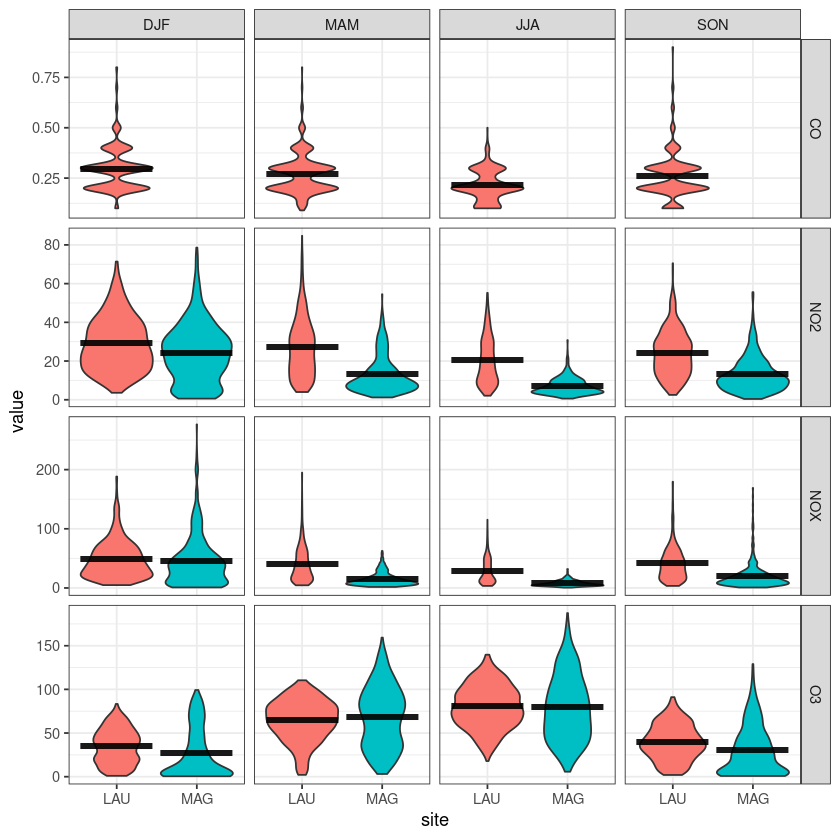

In [37]:
lf %>%
filter(!is.na(value) & variable==chemicals) %>%
ggplot +
facet_grid(variable ~ season, scale = "free_y") +
geom_violin(aes(x=site, y=value, fill=site))+
stat_summary(aes(x=site, y=value), fun=mean, geom="point", shape=95,
                 size=25, color="black", alpha=0.9)+
    theme(legend.position="none")

dev.print(device=png,
     file="figures/chemicals_seasonal_mean_violinPlot.png",
     width=20,height=20,
     units="cm",res=200)

png 
  2

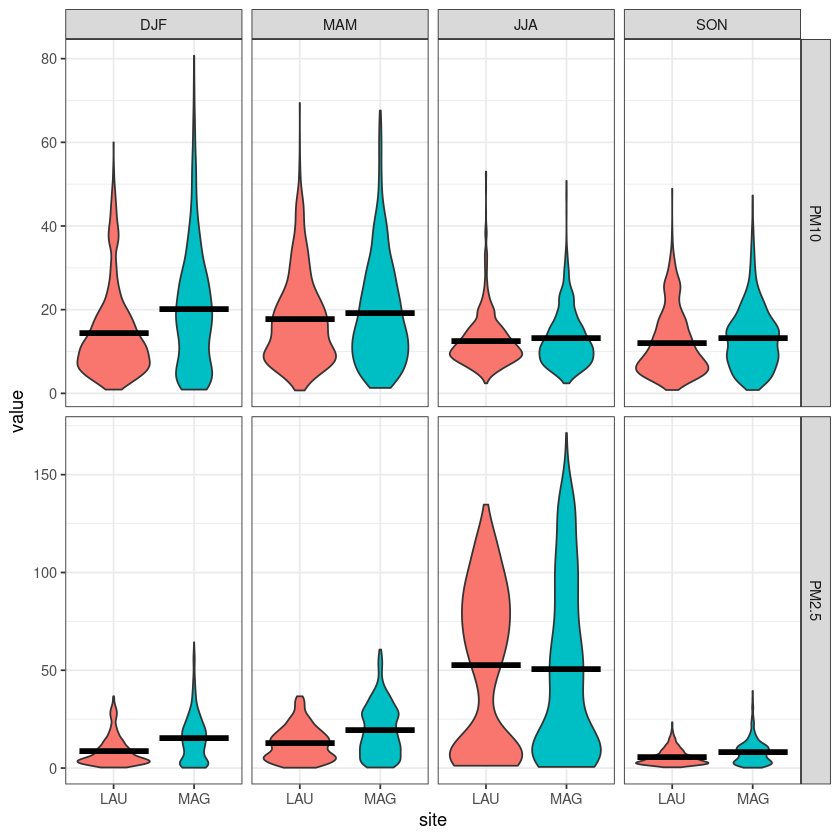

In [41]:
lf %>%
filter(!is.na(value) & variable==particles) %>%
ggplot +
facet_grid(variable ~ season, scale = "free_y") +
geom_violin(aes(x=site, y=value, fill=site))+
stat_summary(aes(x=site, y=value), fun=mean, geom="point", shape=95,
                 size=24, color="black")+
    theme(legend.position="none")

dev.print(device=png,
     file="figures/particles_seasonal_mean_violinPlot.png",
     width=20,height=15,
     units="cm",res=200)

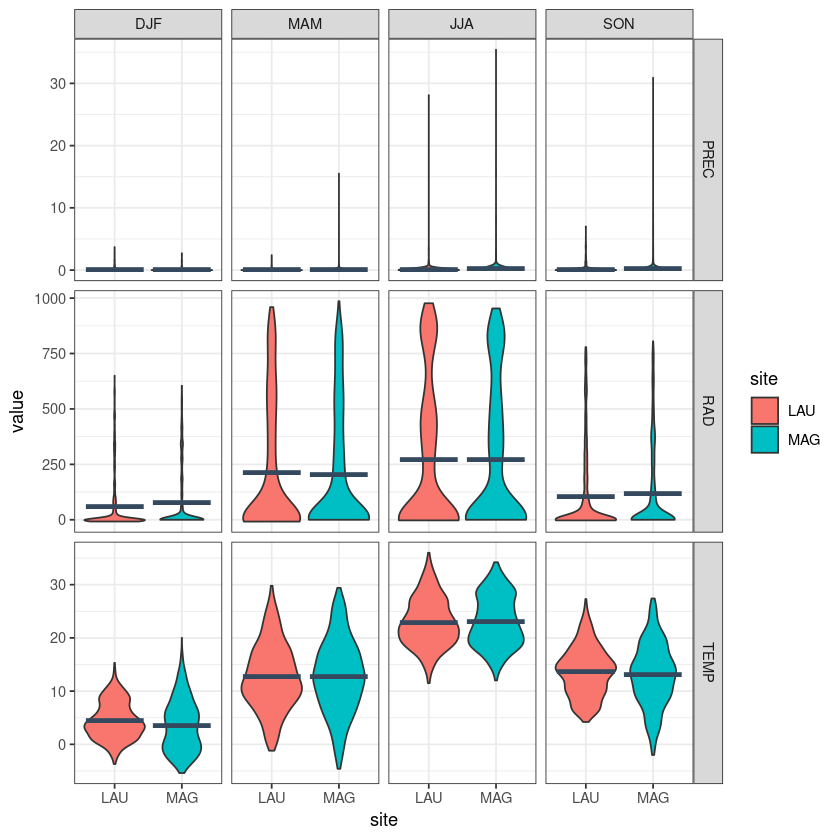

In [22]:
lf %>%
filter(!is.na(value) & variable==meteo) %>%
ggplot +
facet_grid(variable ~ season, scale = "free_y") +
geom_violin(aes(x=site, y=value, fill=site))+
stat_summary(aes(x=site, y=value), fun=mean, geom="point", shape=95,
                 size=20, color="#34495e")

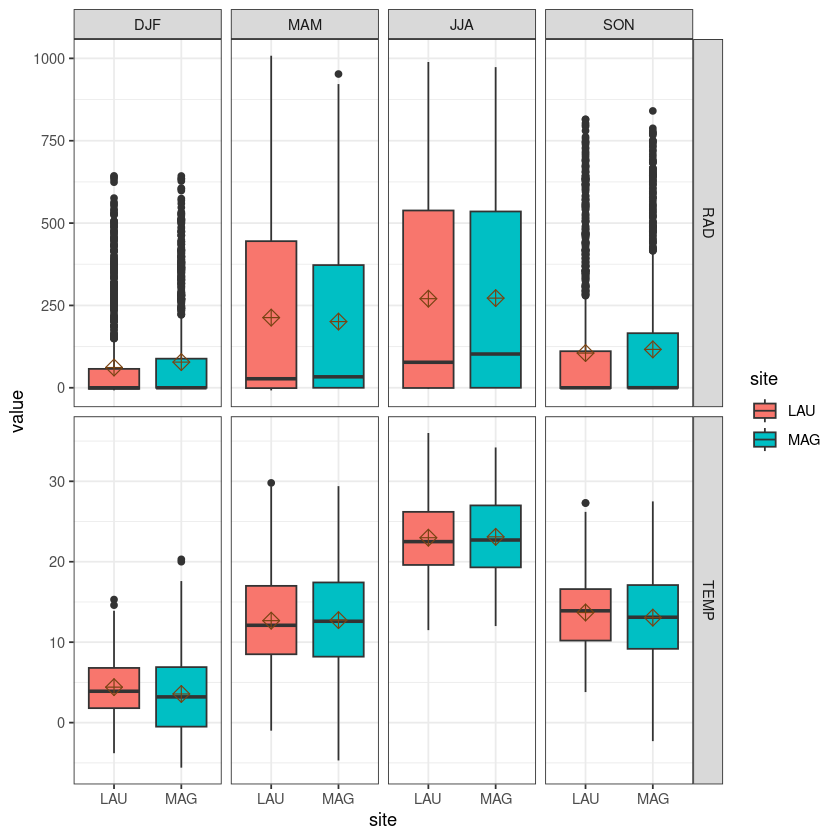

In [43]:
lf %>%
filter(!is.na(value) & variable==c("RAD","TEMP")) %>%
ggplot +
facet_grid(variable ~ season, scale = "free_y") +
geom_boxplot(aes(x=site, y=value, fill=site))+
stat_summary(aes(x=site, y=value), fun=mean, geom="point", shape=9,
                 size=3, color="#784212")

png 
  2

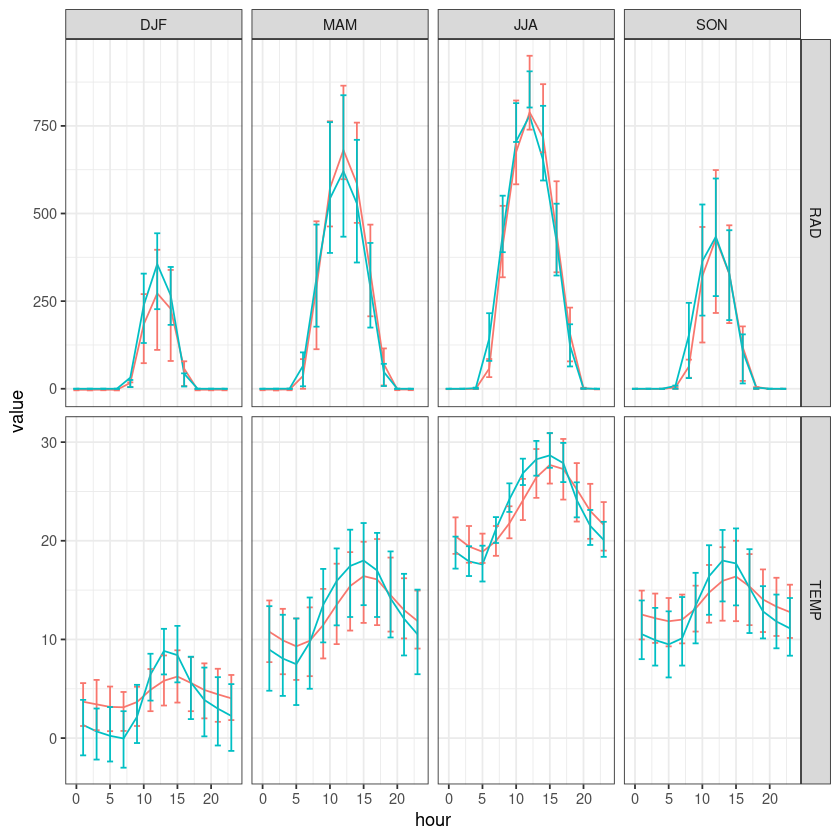

In [44]:
lf %>%
 filter(!is.na(value) & variable==c("RAD", "TEMP")) %>%
 ggplot(aes(x=hour, y=value, group=site, color=site)) +
 facet_grid(variable ~ season, scale = "free_y", drop=TRUE) +
 geom_line(stat="summary", fun="mean")+
 geom_errorbar(stat="summary",
                 fun.min=Percentile(25),
                 fun.max=Percentile(75))+
theme(legend.position="none")

dev.print(device=png,
     file="figures/RADandTEMP_seasonal_daily_variatons.png",
     width=20,height=10,
     units="cm",res=200)

`summarise()` has grouped output by 'date', 'site', 'season'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'months(date)', 'years(date)', 'site',
'season'. You can override using the `.groups` argument.


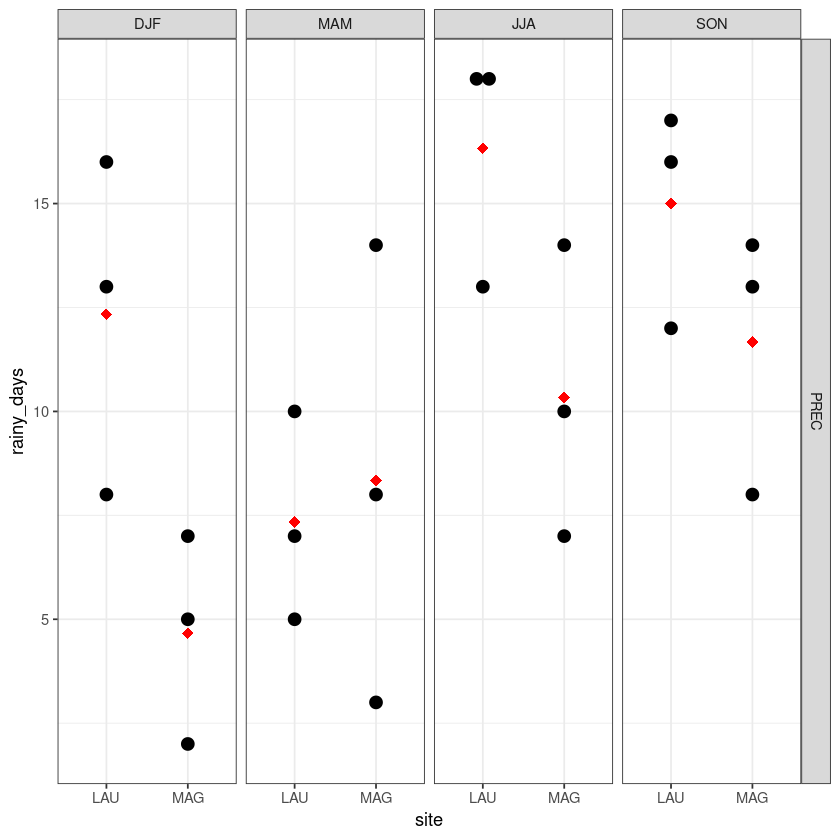

In [60]:
lf %>%
    filter(variable=="PREC" & !is.na(value)) %>%
    group_by(date, site, season, variable) %>%
    summarise(value = sum(value)) %>%
    group_by(months(date), years(date), site, season, variable) %>%
    summarise(mean_val = mean(value),
              rainy_days = sum(value>0),
              sum_val = sum(value),
              h_rainy_days = sum(value > 1)) %>%
ggplot +
    facet_grid(variable ~ season, scale = "free_y") +
    geom_dotplot(aes(x=site, y=rainy_days, group=site), binaxis='y', stackdir='center', binwidth=0.3)+
    stat_summary(aes(x=site, y=rainy_days), fun=mean, geom="point", shape=18,
             size=3, color="red")

`summarise()` has grouped output by 'date', 'site', 'season'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'months(date)', 'years(date)', 'site',
'season'. You can override using the `.groups` argument.


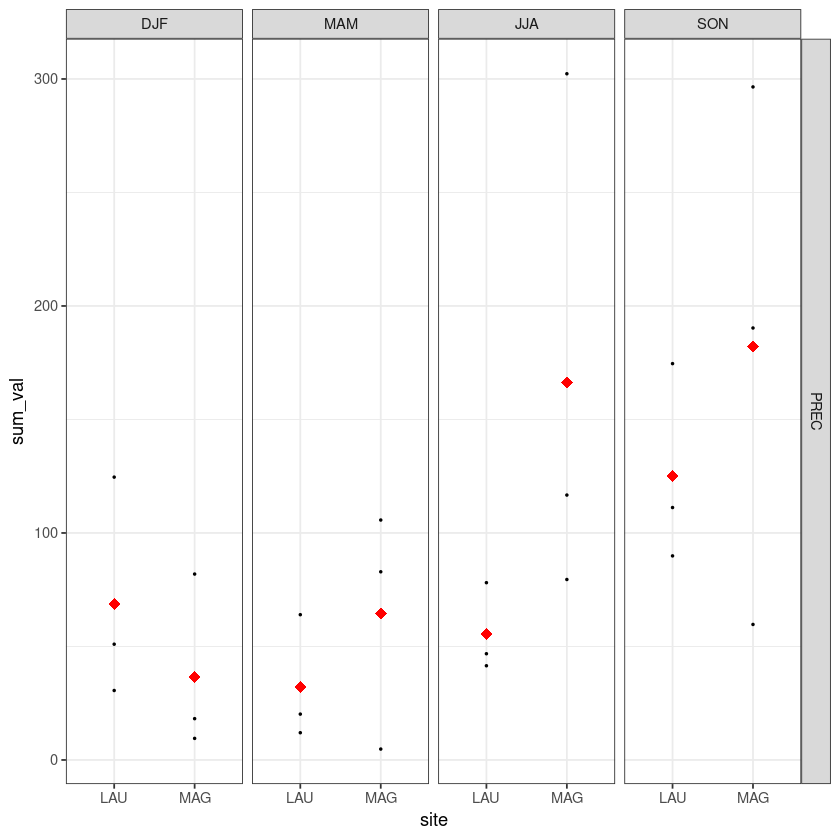

In [61]:
lf %>%
    filter(variable=="PREC" & !is.na(value)) %>%
    group_by(date, site, season, variable) %>%
    summarise(value = sum(value)) %>%
    group_by(months(date), years(date), site, season, variable) %>%
    summarise(mean_val = mean(value),
              rainy_days = sum(value>0),
              sum_val = sum(value),
              h_rainy_days = sum(value > 1)) %>%
ggplot +
    facet_grid(variable ~ season, scale = "free_y") +
    geom_dotplot(aes(x=site, y=sum_val, group=site), binaxis='y', stackdir='center', binwidth=1)+
    stat_summary(aes(x=site, y=sum_val), fun=mean, geom="point", shape=18,
             size=3, color="red")

In [16]:
dailyPrec <- lf %>%
  filter(variable=="PREC") %>% # select variables
  mutate(date = dates(datetime)) %>%           # get the date value
  group_by(site, date) %>%
  summarize(percent.recovery = length(na.omit(value))/length(value)*1e2,
            value = mean(value, na.rm=TRUE),
            season= season,
            rain_hours = sum(value>0),
            rainy_day = ifelse(value>0, TRUE, FALSE)) %>%
  ungroup()

`summarise()` has grouped output by 'site', 'date'. You can override using the
`.groups` argument.


In [9]:
monthlyPrec <- dailyPrec %>%
    mutate(rainy_days = ifelse(rain_hours > 0, TRUE, FALSE)) %>%
    group_by(site, months(date), variable) %>%
    summarize( mean.percent.recovery = mean(percent.recovery),
              mean_daily_prec = mean(value),
              mean_daily_prec_h = mean(rain_hours),
              total_monthly_rain = sum(value),
              total_monthly_rain_h = sum(rain_hours),
              days_of_rain = sum(rainy_day))
              

`summarise()` has grouped output by 'site', 'months(date)'. You can override
using the `.groups` argument.


In [10]:
head(monthlyPrec)

site,months(date),variable,mean.percent.recovery,mean_daily_prec,mean_daily_prec_h,total_monthly_rain,total_monthly_rain_h,days_of_rain
<chr>,<ord>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
LAU,Jan,PREC,98.52151,0.04114823,0.2580645,30.61429,192,192
LAU,Feb,PREC,97.61905,0.07589286,0.4642857,51.00000,312,312
LAU,Mar,PREC,96.23656,0.01612903,0.1612903,12.00000,120,120
LAU,Apr,PREC,93.75000,0.09027778,0.3333333,65.00000,240,240
LAU,May,PREC,100.00000,0.02715054,0.2258065,20.20000,168,168
LAU,Jun,PREC,100.00000,0.10847222,0.6000000,78.10000,432,432


In [26]:
seasonalPrec <- lf %>%
    filter(variable=="PREC" & !is.na(value)) %>%
    group_by(date, site, season, variable) %>%
    summarise(value = sum(value)) %>%
    group_by(months(date), years(date), site, season, variable) %>%
    summarise(mean_val = mean(value),
              rainy_days = sum(value>0),
              sum_val = sum(value),
              h_rainy_days = sum(value > 1))

`summarise()` has grouped output by 'date', 'site', 'season'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'months(date)', 'years(date)', 'site',
'season'. You can override using the `.groups` argument.
